In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../data/train.csv')
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


## Data Cleaning

### Checking Null Values(in percentage)

In [3]:
null_values = [null_value for null_value in df.columns if df[null_value].isnull().sum()>=1]
for value in null_values:
    print(value,np.round(df[value].isnull().mean()*100,5),'% missing values')

Artist Reputation 11.53846 % missing values
Height 5.76923 % missing values
Width 8.98462 % missing values
Weight 9.03077 % missing values
Material 11.75385 % missing values
Transport 21.41538 % missing values
Remote Location 11.86154 % missing values


#### Why Might a missing Values?
- Missing completly at random(MCAR)
- Missing at random(MAR)
- Missing not at random(MNAR)

Here MCAR is a type of missing value in the data set.

### Checking duplicate Values

In [4]:
df.duplicated().sum()

np.int64(0)

### Separating Features

In [5]:
target_feature = 'Cost'

numeric_feature = df.dtypes[df.dtypes != 'object'].index.tolist()
numeric_feature.remove(target_feature)
categorical_feature = df.dtypes[df.dtypes =='object'].index.tolist()

print(f"we have {len(numeric_feature)} numeric features: {numeric_feature}")
print(f"we have {len(categorical_feature)} categorical features: {categorical_feature}")

we have 6 numeric features: ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price']
we have 13 categorical features: ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


### Filling Null Values With Median to check Multicollinearity

In [6]:
df1 = df.copy()
for i in numeric_feature:
    df1[i].fillna(df1[i].median(),inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_2112\2924886807.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[i].fillna(df1[i].median(),inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_2112\2924886807.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

## Multicollinearity Check

When two or more independent variables are corelated to each other.

### Variance Inflation Factor

In [7]:

import statsmodels.api as sm

for i in range(0, len(numeric_feature)):
    x = df1[[numeric_feature[i]]]
    y = df1.Cost
    model = sm.OLS(x,y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1/(1-rsq),2)
    print(f"Variance Inflation Factor of {numeric_feature[i]} column is {vif} \n")

Variance Inflation Factor of Artist Reputation column is 1.01 

Variance Inflation Factor of Height column is 1.01 

Variance Inflation Factor of Width column is 1.02 

Variance Inflation Factor of Weight column is 1.2 

Variance Inflation Factor of Price Of Sculpture column is 1.3 

Variance Inflation Factor of Base Shipping Price column is 1.01 



 All the Columns has VIF around 1, So there is no severe Multicollinearity

### Box Plot

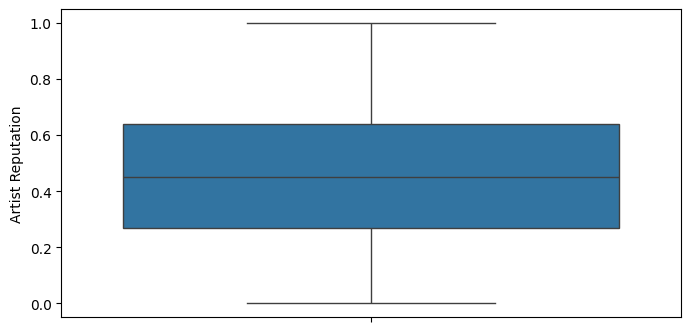

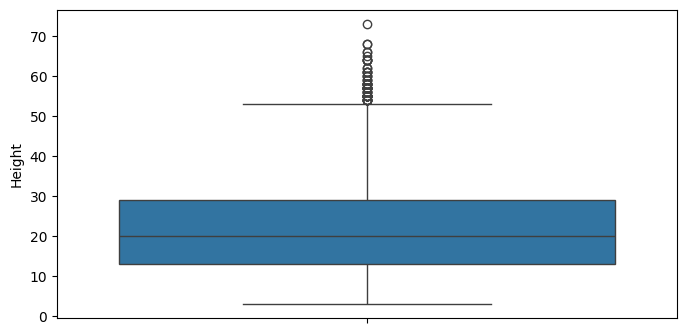

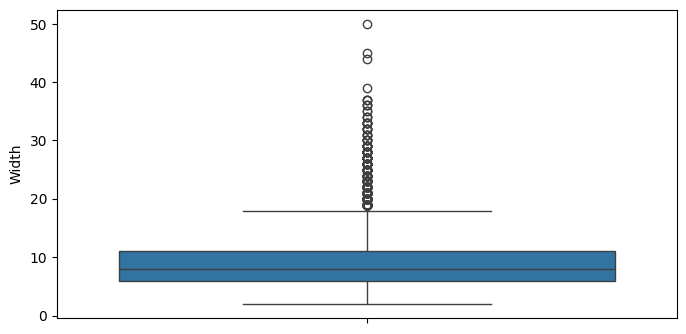

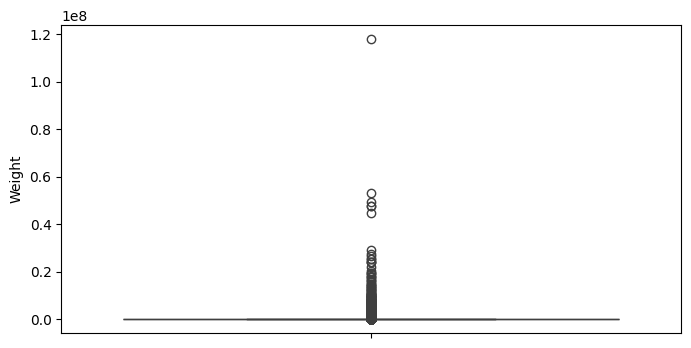

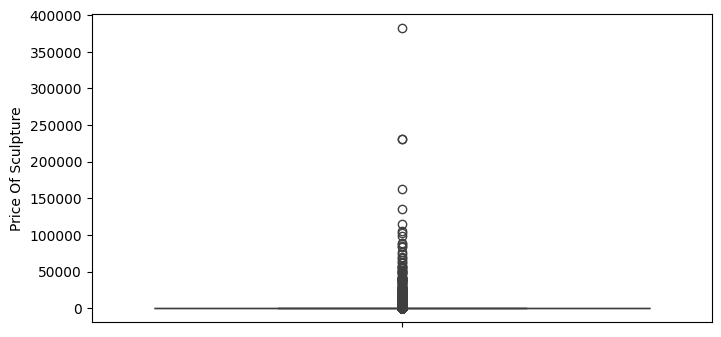

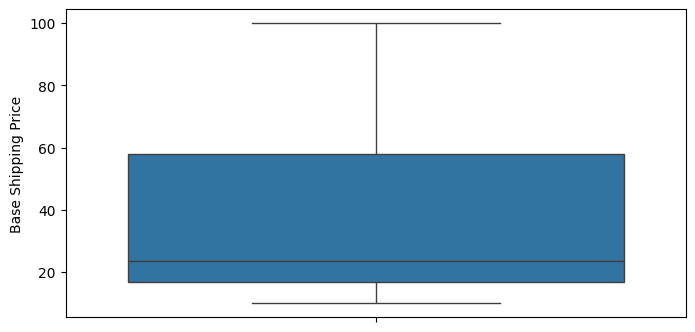

In [8]:
for i in (numeric_feature):
    plt.figure(figsize=(8,4))
    sns.boxplot(df1[i])

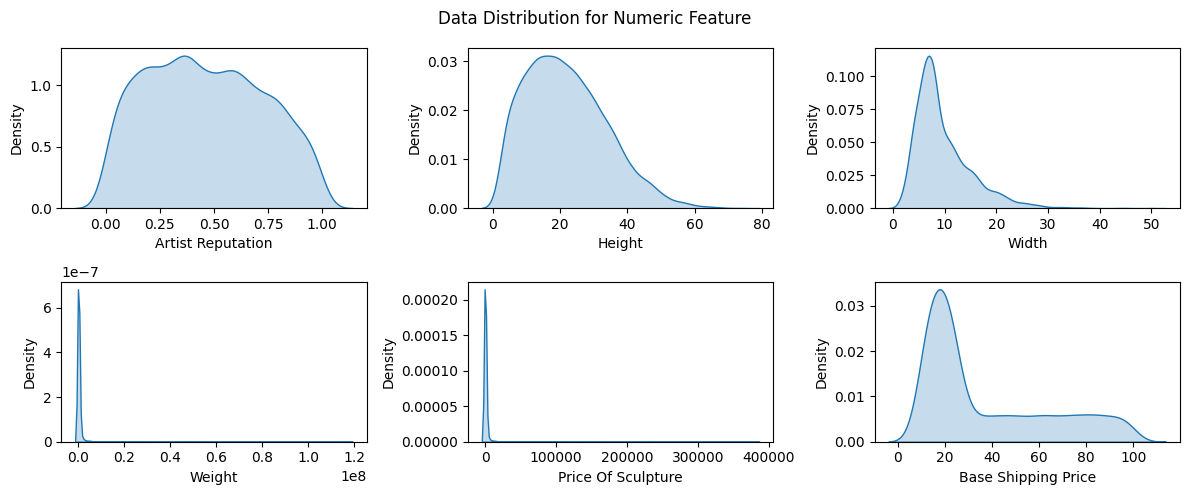

In [9]:
plt.figure(figsize=(12,5))
plt.suptitle("Data Distribution for Numeric Feature")
for i in range(0,len(numeric_feature)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=df[numeric_feature[i]],fill=True)
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

In [10]:
df[numeric_feature].skew()

Artist Reputation       0.141363
Height                  0.594041
Width                   1.546702
Weight                 21.556174
Price Of Sculpture     22.206823
Base Shipping Price     0.918102
dtype: float64

**insights**

- From EDA we find `Price of Sculpture` and `Weight` are positively skewed.
- So we can handle this by using `Power Transformer`or `log Transformer`.
- Also `Base Shipping Price` and `Width` are somewhere skewed but not much as shown by Skeweness Coefficient.

### Checking the Power Transformer on outlier outcome
- `Power Transformer` is preprocessing technique used to `reduce skewness`and `stablizes variance` by applying power based function (Yeo-Johnson or Box-Cox).
- It also helps to `handle Outliers`.

**Why Outliers comes?**
- Data Entry Error: Human Errors.
- Intentional Error: People Give wrong outputs.
- Natural Error: It will be Real Life data.

**Impact of Outliers**
- can cause bias in the output.


In [11]:
outlier_feature = ['Price Of Sculpture','Weight']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=False)
df1[outlier_feature] = pt.fit_transform(df1[outlier_feature])

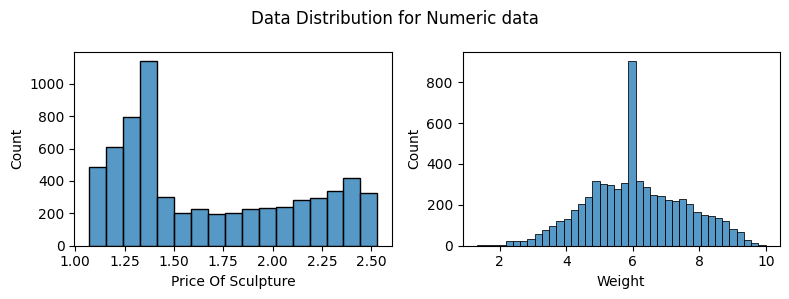

In [12]:
plt.figure(figsize=(8,3))
plt.suptitle("Data Distribution for Numeric data")
for i in range(0,len(outlier_feature)):
    plt.subplot(1,2,i+1)
    sns.histplot(x=df1[outlier_feature[i]])
    plt.xlabel(outlier_feature[i])
    plt.tight_layout()

In [13]:
df1[outlier_feature].skew()

Price Of Sculpture    0.478648
Weight                0.027309
dtype: float64

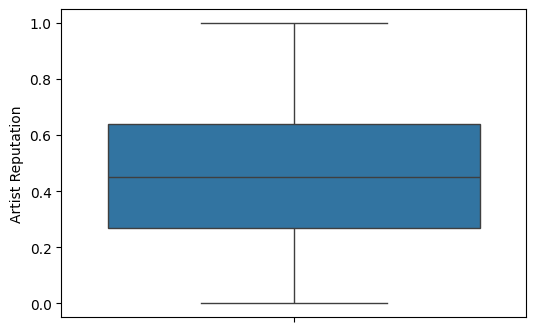

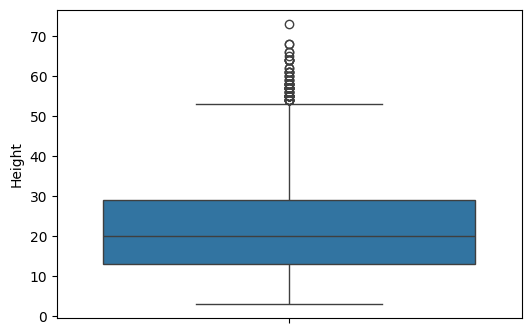

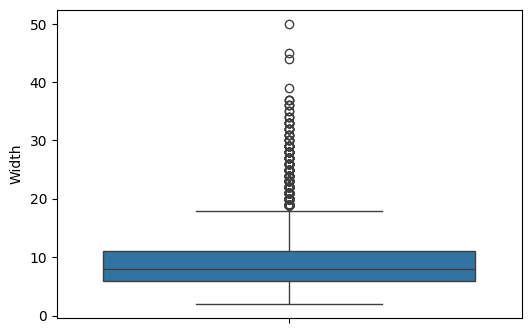

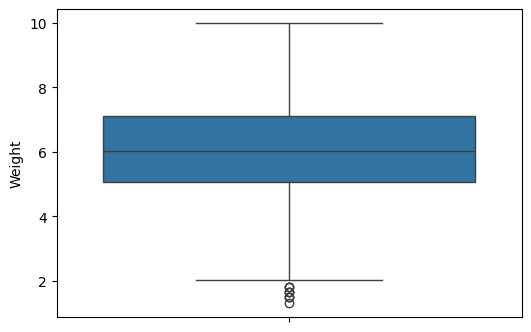

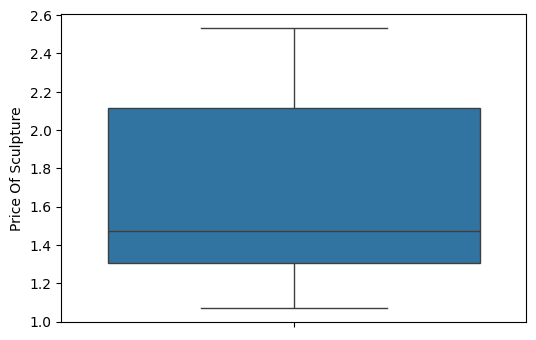

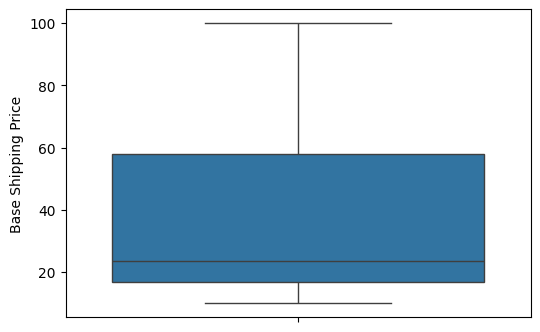

In [14]:
for i in numeric_feature:
    plt.figure(figsize=(6,4))
    sns.boxplot(df1[i])

## Removing Outlier From Target Column

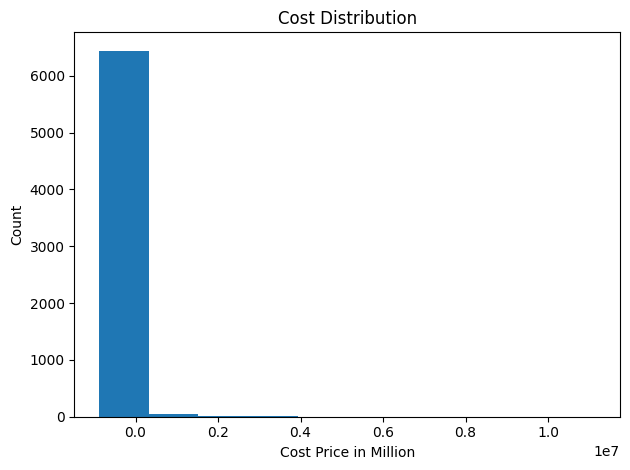

In [15]:
plt.hist(df1['Cost'])
plt.title("Cost Distribution")
plt.xlabel("Cost Price in Million")
plt.ylabel("Count")
plt.tight_layout()

In [16]:
df1["Cost"].skew()

np.float64(29.817459343776964)

Need to apply transformation to the target column to make it normally distributed.Use 1p to avoid `inf` values arise due to `0` in target column

In [17]:
df1['Cost'] = np.log1p(df1['Cost'])

c:\Users\harsh\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


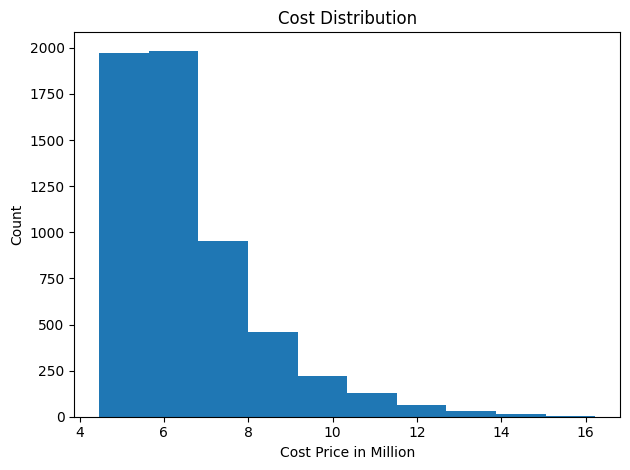

In [18]:
plt.hist(df1['Cost'])
plt.title("Cost Distribution")
plt.xlabel("Cost Price in Million")
plt.ylabel("Count")
plt.tight_layout()

In [19]:
df1['Cost'].skew()

np.float64(1.7804525777227338)

Data Looks good after log Transformation but not normally distributed.

## Feature Creation For Date Column.

In [20]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [21]:
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

C:\Users\harsh\AppData\Local\Temp\ipykernel_2112\3964803925.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
C:\Users\harsh\AppData\Local\Temp\ipykernel_2112\3964803925.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])


In [22]:
df['Month'] = pd.to_datetime(df['Scheduled Date']).dt.month
df['Year'] = pd.to_datetime(df['Scheduled Date']).dt.year

In [23]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,Month,Year
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,...,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",-283.29,6,2015
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,...,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",-159.96,3,2017
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,...,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",-154.29,3,2015
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,...,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",-161.16,5,2015
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,...,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23,12,2016


In [24]:
numeric_feature.append('Month')
numeric_feature.append('Year')

In [25]:
numeric_feature

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price',
 'Month',
 'Year']

## Drop unnecessary Columns

In [26]:
to_drop_columns = ['Customer Id', 'Artist Name', 'Customer Location', 'Scheduled Date', 'Delivery Date']

In [27]:
df.drop(columns=to_drop_columns,inplace=True)

## `Model building`

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

### Spilit X and Y

In [29]:
X = df.drop(columns="Cost",axis=1)
y = np.abs(df['Cost'])

In [30]:
y = np.log1p(y)

**As my data skewed we have seen earlier thats why np.log1p used**

### Train Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Feature Encoding And Scaling

Selecting Numerical and categorical Features for feature Scaling

In [32]:
numeric_feature = [x for x in numeric_feature if x not in outlier_feature]
categorical_feature = [x for x in categorical_feature if x not in to_drop_columns]

(numeric_feature),(categorical_feature),(outlier_feature)

(['Artist Reputation',
  'Height',
  'Width',
  'Base Shipping Price',
  'Month',
  'Year'],
 ['Material',
  'International',
  'Express Shipment',
  'Installation Included',
  'Transport',
  'Fragile',
  'Customer Information',
  'Remote Location'],
 ['Price Of Sculpture', 'Weight'])

In [33]:
numeric_feature_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                                           ('scaler',RobustScaler())])

categorical_feature_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                               ('one_hot_encoder',OneHotEncoder())])

outlier_feature_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                                           ('transformer',PowerTransformer(standardize=True))])

preprocessor = ColumnTransformer([('Numeric Pipeline',numeric_feature_pipeline,numeric_feature),
                                  ('Categorical Features Pipeline',categorical_feature_pipeline,categorical_feature),
                                  ('Outlier Features Pipeline',outlier_feature_pipeline,outlier_feature)])

**why pipeline is required?**
- this is a systematic way to handle missing values, scaling, encoding, and outliers so that your ML models get clean, comparable inputs.

In [34]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### Model Selection

In [35]:
def evaluate_reg(true,predicted):
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mean_absolute_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [36]:
def evaluate_models(X_train,X_test,y_train,y_test,models):
    model_list = []
    r2_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train,y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        model_train_mae, model_train_rmse, model_train_r2 = evaluate_reg(y_train,y_train_pred)

        model_test_mae, model_test_rmse, model_test_r2 = evaluate_reg(y_test,y_test_pred)

        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])

        print("Model performance for Training Data")
        print(f"-Root Mean Square Error:{round(model_train_rmse,3)}")
        print(f"-Mean Absolute Error:{round(model_train_mae,3)}")
        print(f"-R2 Score:{round(model_train_r2,3)}")

        print("------------------------------")

        print("Model performance for Test Data")
        print(f"-Root Mean Square Error:{round(model_test_rmse,3)}")
        print(f"-Mean Absolute Error:{round(model_test_mae,3)}")
        print(f"-R2 Score:{round(model_test_r2,3)}")

        r2_list.append(model_test_r2)

        print("="*35)
        print('\n')

    report = pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2 score"]).sort_values(by=['R2 score'],ascending=False)

    return report



In [37]:
models = {
    "LinearRegression":LinearRegression(),
    "K Nearest Neighbour":KNeighborsRegressor(),
    "Decesion Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XG Boost Regressor":XGBRegressor(),
    "Cat Boost Regressor":CatBoostRegressor(),
    "ADA Boost Regressor":AdaBoostRegressor(),
    "Support Vector Machine Regressor":SVR()
}

In [38]:
base_report = evaluate_models(X_train,X_test,y_train,y_test,models)

LinearRegression
Model performance for Training Data
-Root Mean Square Error:0.705
-Mean Absolute Error:0.497
-R2 Score:0.801
------------------------------
Model performance for Test Data
-Root Mean Square Error:0.696
-Mean Absolute Error:0.484
-R2 Score:0.822


K Nearest Neighbour
Model performance for Training Data
-Root Mean Square Error:0.601
-Mean Absolute Error:0.361
-R2 Score:0.882
------------------------------
Model performance for Test Data
-Root Mean Square Error:0.653
-Mean Absolute Error:0.426
-R2 Score:0.841


Decesion Tree
Model performance for Training Data
-Root Mean Square Error:0.0
-Mean Absolute Error:0.0
-R2 Score:1.0
------------------------------
Model performance for Test Data
-Root Mean Square Error:0.572
-Mean Absolute Error:0.328
-R2 Score:0.899


Random Forest
Model performance for Training Data
-Root Mean Square Error:0.281
-Mean Absolute Error:0.079
-R2 Score:0.994
------------------------------
Model performance for Test Data
-Root Mean Square Error:0.45

In [39]:
base_report

,Model Name,R2 score
5,Cat Boost Regressor,0.971866
4,XG Boost Regressor,0.963607
3,Random Forest,0.956445
7,Support Vector Machine Regressor,0.913032
2,Decesion Tree,0.898870
6,ADA Boost Regressor,0.851655
1,K Nearest Neighbour,0.840555
0,LinearRegression,0.821773


### Hyperparameter Tuning

In [40]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

cat_params = {"learning_rate": [0.1, 0.01, 0.6, 0.5],
              "max_depth": [4, 5, 6, 8, 12]}

In [41]:
randomcv_models = [("RF",RandomForestRegressor(),rf_params),
                   ("XGBoost",XGBRegressor(),xgboost_params),
                   ("CatBoost",CatBoostRegressor(verbose=False),cat_params)
                   ]

In [42]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=3,
                                cv=2,
                                verbose=2,
                                n_jobs=5)
    random.fit(X_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.01, 'colsample_bytree': 0.5}
---------------- Best Params for CatBoost -------------------
{'max_depth': 6, 'learning_rate': 0.6}


In [43]:
# Reinitializing Models
models = { "Random Forest Regressor": RandomForestRegressor(**model_param['RF'], n_jobs=-1),
    "XGBRegressor": XGBRegressor(**model_param['XGBoost'], n_jobs=-1), 
     "CatBoosting Regressor": CatBoostRegressor(**model_param['CatBoost'],verbose=False)
     }

In [44]:
retrained_report = evaluate_models(X_train,X_test,y_train,y_test,models)

Random Forest Regressor
Model performance for Training Data
-Root Mean Square Error:0.321
-Mean Absolute Error:0.103
-R2 Score:0.991
------------------------------
Model performance for Test Data
-Root Mean Square Error:0.478
-Mean Absolute Error:0.229
-R2 Score:0.95


XGBRegressor
Model performance for Training Data
-Root Mean Square Error:0.42
-Mean Absolute Error:0.177
-R2 Score:0.975
------------------------------
Model performance for Test Data
-Root Mean Square Error:0.501
-Mean Absolute Error:0.251
-R2 Score:0.948


CatBoosting Regressor
Model performance for Training Data
-Root Mean Square Error:0.109
-Mean Absolute Error:0.012
-R2 Score:1.0
------------------------------
Model performance for Test Data
-Root Mean Square Error:0.449
-Mean Absolute Error:0.202
-R2 Score:0.962




In [45]:
retrained_report

,Model Name,R2 score
2,CatBoosting Regressor,0.961797
0,Random Forest Regressor,0.950133
1,XGBRegressor,0.947904


**`Best Model is CatBoost Regressor with 96% R2 Score.`**

In [46]:
df.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,Month,Year
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,-283.29,6,2015
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,-159.96,3,2017
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,-154.29,3,2015
3,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,-161.16,5,2015
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,-159.23,12,2016


## Pickling and Predicting new cost

In [50]:
model = CatBoostRegressor(**model_param['CatBoost'],verbose=False)
model.fit(X_train, y_train)


In [51]:
import pickle
pickle.dump(preprocessor,open("preprocessor.pkl","wb"))
pickle.dump(model,open("shipment_model.pkl","wb"))

In [52]:
new_data = pd.DataFrame([{
    "Artist Reputation": 0.26,
    "Height": 17.0,
    "Width": 6.0,
    "Base Shipping Price": 16.27,
    "Month": 6,
    "Year": 2015,

    "Material": "Brass",
    "International": "Yes",
    "Express Shipment": "Yes",
    "Installation Included": "No",
    "Transport": "Airways",
    "Fragile": "No",
    "Customer Information": "Working Class",
    "Remote Location": "No",

    "Price Of Sculpture": 13.91,
    "Weight": 4128.0
}])


In [53]:
model = pickle.load(open("shipment_model.pkl",'rb'))
preprocessor = pickle.load(open("preprocessor.pkl","rb"))

processed = preprocessor.transform(new_data)
pred = model.predict(processed)

final_cost = np.expm1(pred)[0]
print("Predicted Shipment Cost:", final_cost)

Predicted Shipment Cost: 278.60435430445835
